<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [59]:
#код в ссылке https://gist.github.com/fuwiak/9c695b51c33b2e052c5a721383705a9c
#код с ссылки запускаем так(BASH) python3 hh_parser.py
import requests
import pandas as pd

number_of_pages = 100
#number_of_ads = number_of_pages * per_page

job_title = ["'Data Analyst' or 'data scientist' or 'data engineer' or 'Аналитик'"]

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    
#     csv_name = job+".csv"
    csv_name = 'data.csv'
    
    df.to_csv(csv_name)

В итоге мы получили файл csv с названием указанным в job_title.
В указанном будет загружен один файл с вакансиями с фразой
«Data Analyst» и «data scientist». Если хотите отдельно поменяйте строку на

job_title=['Data Analyst', 'Data Scientist']

Тогда вы получаете 2 файла с этими названиями.

In [174]:
# cloud

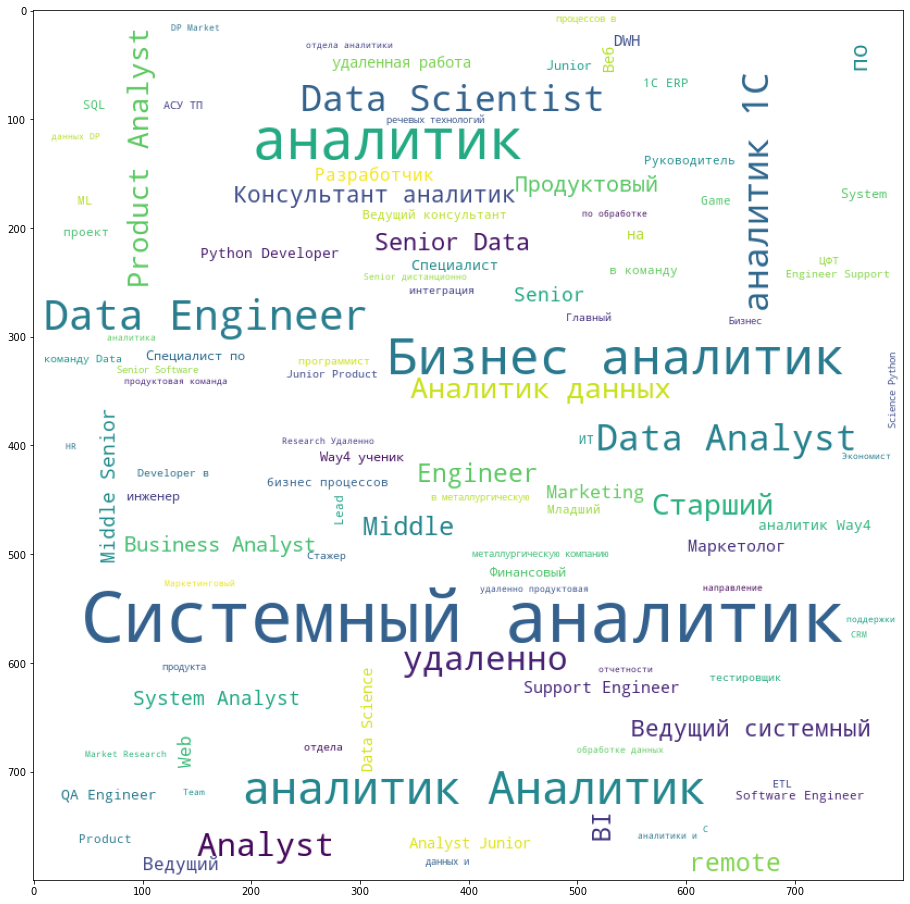

In [60]:
# графика

from collections import Counter

vacancy_names = df['name'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += x + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('vacancy_cloud.png')

In [210]:
def json_from(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['from']

def json_to(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['to']

def df_type(x):
    return type(x)

def json_currency(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['currency']

def requirement(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['requirement']

def responsibility(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['responsibility']

def name_Analyst(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return '1'
    return None

def name_Engineer(x):
    x = x.lower()
    if 'engineer' in x:
        return '1'
    return None

def name_Scientist(x):
    x = x.lower()
    if 'scientist' in x:
        return '1'
    return None

def name_Developer(x):
    x = x.lower()
    if 'developer' in x:
        return '1'
    return None

def name(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 'analyst'
    elif 'engineer' in x:
        return 'engineer'
    elif 'scientist' in x:
        return 'scientist'
    elif 'developer' in x:
        return 'developer'
    return None

In [227]:
df_new.drop(df_new.index, inplace=True)
df_new = pd.DataFrame() 
df_new['name'] = df['name']
df_new['name_short'] = df['name'].apply(name)
df_new['alternate_url'] = df['alternate_url']
df_new['from'] = df['salary'].apply(json_from)
df_new['to'] = df['salary'].apply(json_to)
df_new['currency'] = df['salary'].apply(json_currency)
df_new['requirement'] = df['snippet'].apply(requirement)
df_new['responsibility'] = df['snippet'].apply(responsibility)
df_new['Analyst'] = df['name'].apply(name_Analyst)
df_new['Engineer'] = df['name'].apply(name_Engineer)
df_new['Scientist'] = df['name'].apply(name_Scientist)
df_new['Developer'] = df['name'].apply(name_Developer)

In [244]:
df_analyst = df_new[df_new['name_short'].isin(['analyst'])]

In [240]:
pd.pivot_table(df_new,
               index = ['name_short', 'currency'], 
               values = ['from', 'to'],
               aggfunc = ['max', 'min', 'mean', 'count'])

max                min                     mean  \
                         from        to     from        to           from   
name_short currency                                                         
analyst    EUR         2000.0    3000.0   2000.0    3000.0    2000.000000   
           RUR       260000.0  525000.0   1320.0   30000.0  101073.558511   
           USD         4000.0    7000.0    700.0     780.0    1991.666667   
developer  USD         5000.0    6000.0   3300.0    4000.0    4266.666667   
engineer   EUR         4500.0    4000.0   2500.0    2500.0    3700.000000   
           RUR       320000.0  500000.0  50000.0  100000.0  193333.333333   
           USD         8000.0   12000.0   3000.0    3000.0    5307.692308   
scientist  EUR         3500.0       NaN   3500.0       NaN    3500.000000   
           RUR       350000.0  350000.0  90000.0  200000.0  208571.428571   
           USD         2500.0    4000.0   1500.0    3000.0    2000.000000   

                                   count       
                                to  from   to  
name_short currency                            
analyst    EUR         3000.000000     1    1  
           RUR       157081.319018   188  163  
           USD         2304.615385    12   13  
developer  USD         4666.666667     6    3  
engineer   EUR         3250.000000     5    2  
           RUR       300714.285714    18   14  
           USD         6700.000000    13    5  
scientist  EUR                 NaN     1    0  
           RUR       270000.000000     7    4  
           USD         3500.000000     2    2

In [355]:
d = pd.pivot_table(df_new[df_new['name_short'].isin(['analyst'])],
               index = ['name'], 
               values = ['from', 'to'],
               #aggfunc = ['max', 'min', 'mean', 
               aggfunc = ['count'])

In [356]:
d.to_excel('2.xlsx')

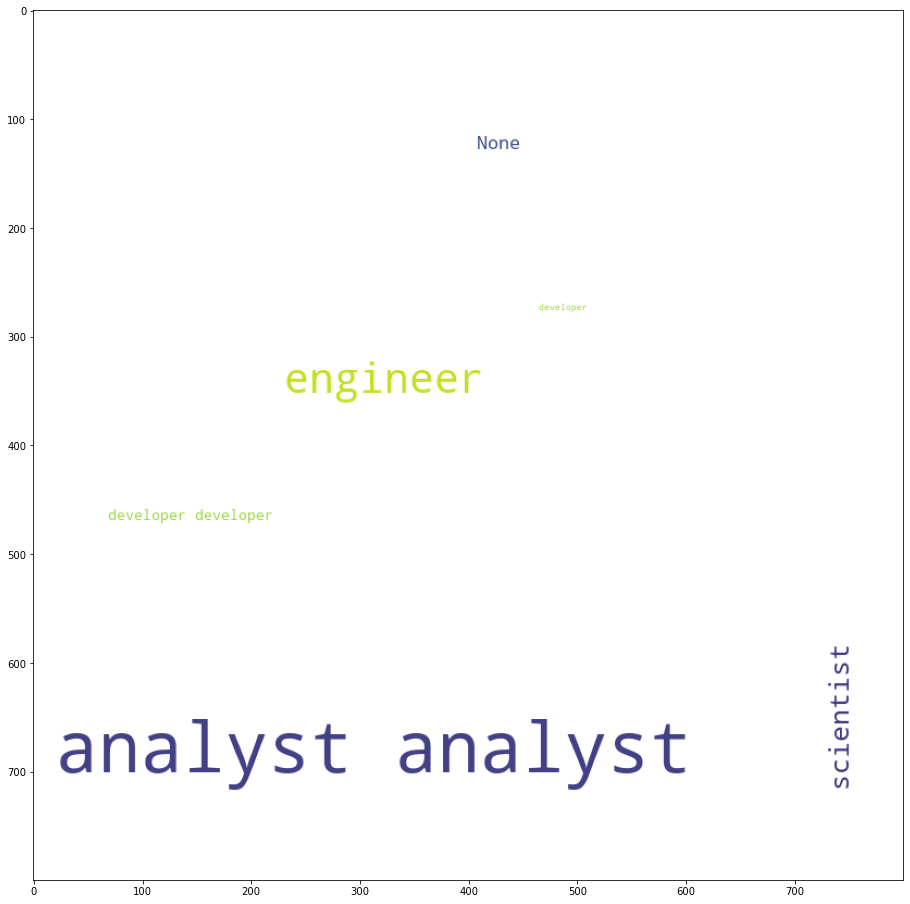

In [230]:
vacancy_names = df_new['name_short'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('vacancy_cloud_short.png')

In [269]:
analitic = list(df_analyst.groupby(['name']).count().sort_values('name_short', ascending=False).head().index)

In [283]:
df_analyst.groupby(['name']).count().sort_values('name_short', ascending=False).head()

,name_short,alternate_url,from,to,currency,requirement,responsibility,Analyst,Engineer,Scientist,Developer
name,,,,,,,,,,,
Системный аналитик,100,100,16,22,26,100,100,100,0,0,0
Бизнес-аналитик,46,46,10,6,11,46,46,46,0,0,0
Аналитик,45,45,9,7,10,45,45,45,0,0,0
Ведущий системный аналитик,16,16,1,3,3,16,16,16,0,0,0
Data Analyst,11,11,4,3,5,11,11,11,0,0,0


In [275]:
df_analyst5 = df_analyst[df_analyst['name'].isin(analitic)]
df_analyst5 = df_analyst5[['name', 'from', 'to', 'currency']]

In [336]:
df_analyst5['mean'] = df_analyst5['to'] - df_analyst5['from']

<ipython-input-336-3d68e83af857>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyst5['mean'] = df_analyst5['to'] - df_analyst5['from']


In [337]:
df_analyst5.head()

,name,from,to,currency,mean
0,Data Analyst,NaN,NaN,None,NaN
8,Data Analyst,90000.0,150000.0,RUR,60000.0
13,Data Analyst,220000.0,NaN,RUR,NaN
14,Data Analyst,220000.0,NaN,RUR,NaN
19,Системный аналитик,70000.0,200000.0,RUR,130000.0


In [307]:
import numpy as np

In [342]:
pd.pivot_table(df_analyst5,
               index = ['name', 'currency'], 
               #values = ['from', 'to'],
               aggfunc = {#'from': [max, min, np.mean, len], 
                          #'to': [max, min, np.mean, len],
                          'mean': [max, min, np.mean],
#                           'name': ['count']
                          }
              )

mean                         
                                          max           mean       min
name                       currency                                   
Data Analyst               RUR       100000.0   80000.000000   60000.0
Аналитик                   RUR        60000.0   36666.666667       0.0
Бизнес-аналитик            RUR        90000.0   59000.000000   30000.0
Ведущий системный аналитик RUR       100000.0  100000.000000  100000.0
Системный аналитик         RUR       150000.0   77166.666667   30000.0

In [335]:
df_analyst5.to_excel('5.xlsx')

In [334]:
for row in df_analyst5.itertuples(index=False):
    print(*row)


Data Analyst nan nan None
Data Analyst 90000.0 150000.0 RUR
Data Analyst 220000.0 nan RUR
Data Analyst 220000.0 nan RUR
Системный аналитик 70000.0 200000.0 RUR
Системный аналитик 200000.0 230000.0 RUR
Системный аналитик nan nan None
Системный аналитик 210000.0 nan RUR
Системный аналитик 130000.0 250000.0 RUR
Системный аналитик 80000.0 nan RUR
Системный аналитик 80000.0 nan RUR
Системный аналитик nan 230000.0 RUR
Системный аналитик 130000.0 200000.0 RUR
Data Analyst 100000.0 200000.0 RUR
Ведущий системный аналитик nan nan None
Системный аналитик nan nan None
Системный аналитик nan 525000.0 RUR
Аналитик nan 90000.0 RUR
Аналитик nan nan None
Data Analyst nan 150000.0 RUR
Системный аналитик 200000.0 350000.0 RUR
Системный аналитик nan nan None
Бизнес-аналитик nan nan None
Системный аналитик nan nan None
Data Analyst nan nan None
Аналитик 100000.0 150000.0 RUR
Аналитик nan nan None
Data Analyst nan nan None
Аналитик nan nan None
Data Analyst nan nan None
Бизнес-аналитик nan nan None
Системн